# KL Divergence

KL divergence or relative entropy is a measure of how one probability distribution is different from a reference probability distribution.

## Core concept

> Calculate the distance between two probability distributions

## Log Likelihood Ratio

Let's say we have data $X={x_1,x_2,...,x_n}$, with two different distributions $p_\theta$ and $q_\phi$, and we want to calculate the difference between these two distributions for $x_i$, they most straightforward way could be:

$$p_\theta(x_i) - p_\phi(x_i)$$

If we take a log on both distributions (which prevents from rounding zero), the formula goes to:

$$log{p_\theta(x_i)} - \log{p_\phi(x_i)}$$

to represent this formula in another way,

$$\log{\left[\frac{p_\theta(x_i)}{{p_\phi(x_i)}}\right]}$$

which is called the `Log Likelihood Ratio`.



## Expected Value

Before we go to any further, let's think about what we are truly looking for: **A number which represents the average difference between two distributions.**

Since we are dealing with random variables, there is no such term for "average", but `Expected Value` instead.

The expected value for `discrete random variable` is: 

$$\mathbb{E}_{p_\theta}\left[h\left(X\right)\right] = \sum_{i=1}^{\inf}{h\left(x_i\right)}{p_\theta}\left(x_i\right)$$

> This is also called as weight average of instances of random variables.

for `continuous random variable`, the formula become:

$$\mathbb{E}_{p_\theta}\left[h\left(X\right)\right] = \int_\mathbb{R}{h\left(x_i\right)}{p_\theta}\left(x_i\right)$$

## Formula

If we look closer, the `Log Likelihood Ratio` is just a function of random variable, since we are looking for the "average" difference between two distributions, we apply the weight $p_\theta$ and the formula becomes:

For distributions P and Q of a `continuous random variable`, the Kullback-Leibler divergence is computed as an integral:
$$D_{KL}\left(P \parallel Q\right) = \int{p\left(x\right)\log{\left[\frac{p\left(x\right)}{q\left(x\right)}\right]}}dx$$

if P and Q represent the probability distribution of a `discrete random variable`, the Kullback-Leibler divergence is calculated as a summation:

$$D_{KL}\left(P \parallel Q\right) = \sum{p\left(i\right)\log{\left[\frac{p_i\left(x\right)}{q_i\left(x\right)}\right]}} $$

## Example: Calculating KL Divergence in Python

We can make the KL divergence concrete with a worked example.

Consider a random variable with three events as different colors. We may have two different probability distributions for this variable; for example:

In [2]:
...
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

We can plot a bar chart of these probabilities to compare them directly as probability histograms.

The complete example is listed below.

P=1.000 Q=1.000


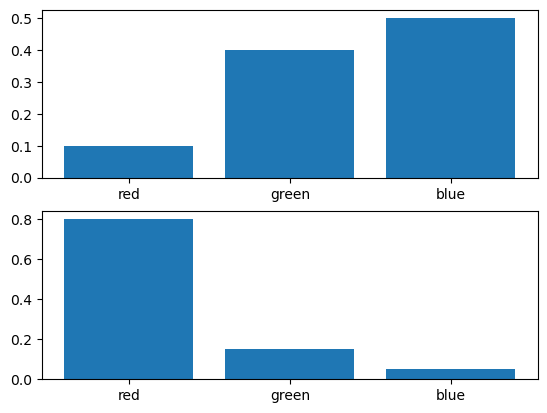

In [4]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

Running the example creates a histogram for each probability distribution, allowing the probabilities for each event to be directly compared.

We can see that indeed the distributions are different.



Next, we can develop a function to calculate the KL divergence between the two distributions.

We will use log base-2 to ensure the result has units in bits.

We can then use this function to calculate the KL divergence of P from Q, as well as the reverse, Q from P.


In [11]:
# example of calculating the kl divergence between two mass functions
from math import log2

# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# define distributions
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits
